Transfer Learning VGG 16 and Vgg 19 Using Keras

In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import Libraries

In [28]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [29]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [30]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/train'
valid_path = '/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/val'


In [31]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [32]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [33]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/train/*')

In [34]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [36]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [37]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [38]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [39]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [40]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [41]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 53s 799ms/step - loss: 2.6235 - accuracy: 0.3696 - val_loss: 1.7293 - val_accuracy: 0.3488
Epoch 2/20
61/61 [==============================] - 47s 768ms/step - loss: 1.3724 - accuracy: 0.5126 - val_loss: 1.0849 - val_accuracy: 0.5648
Epoch 3/20
61/61 [==============================] - 47s 766ms/step - loss: 1.0529 - accuracy: 0.6007 - val_loss: 0.7784 - val_accuracy: 0.7006
Epoch 4/20
61/61 [==============================] - 49s 794ms/step - loss: 0.7940 - accuracy: 0.6868 - val_loss: 0.7216 - val_accuracy: 0.7068
Epoch 5/20
61/61 [==============================] - 48s 794ms/step - loss: 0.7572 - accuracy: 0.6930 - val_loss: 0.9607 - val_accuracy: 0.5494
Epoch 6/20
61/61 [==============================] - 47s 767ms/step - loss: 1.0196 - accuracy: 0.6084 - val_loss: 0.8477 - val_accuracy: 0.6142
Epoch 7/20
61/61 [==============================] - 47s 773ms/step - loss: 0.7551 - accuracy: 0.7053 - val_loss: 0.7833 - val_accuracy: 0.6914

In [42]:
import matplotlib.pyplot as plt

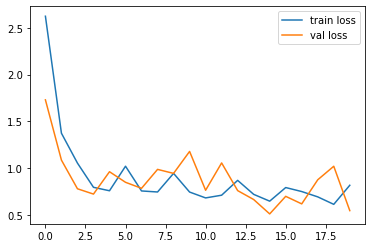

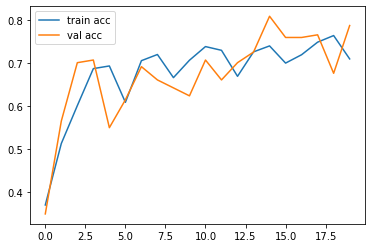

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [44]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [45]:
y_pred = model.predict(test_set)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([3, 1, 3, 0, 2, 1, 3, 3, 3, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 3, 3,
       3, 1, 0, 3, 2, 3, 3, 1, 3, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1, 3, 3,
       2, 3, 3, 2, 1, 0, 3, 0, 0, 0, 3, 3, 0, 3, 2, 2, 3, 3, 1, 0, 3, 1,
       3, 3, 3, 3, 0, 1, 3, 3, 0, 0, 3, 3, 0, 1, 0, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 1, 2, 2, 1, 3, 3, 3, 1, 1, 2, 2, 0, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 2, 3, 2, 1, 3, 3, 1, 3, 1, 1, 0, 2, 2, 0, 3, 2, 1, 3, 0,
       3, 3, 3, 2, 2, 1, 3, 3, 0, 1, 1, 0, 2, 3, 3, 2, 3, 3, 1, 0, 3, 3,
       2, 3, 3, 2, 1, 3, 1, 2, 1, 3, 0, 0, 3, 2, 3, 0, 3, 3, 1, 3, 3, 1,
       3, 3, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 3, 1, 3, 3, 2, 2, 1, 0, 3, 3,
       1, 3, 3, 2, 1, 1, 3, 1, 3, 0, 3, 0, 1, 3, 0, 3, 3, 3, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 2, 0, 3, 1, 1, 3, 1, 2, 1, 3,
       3, 3, 3, 3, 0, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 3,
       1, 2, 0, 0, 0, 1, 3, 3, 3, 1, 0, 1, 0, 3, 1, 3, 2, 3, 1, 3, 0, 2,
       3, 0, 2, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 2, 3,

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [47]:
model=load_model('model_resnet50.h5')

In [49]:
img=image.load_img('/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/test/diseased cotton plant/dd (328).jpg',target_size=(224,224))

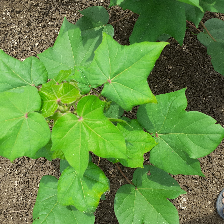

In [50]:
img

In [51]:
x=image.img_to_array(img)
x

array([[[ 86.,  77.,  60.],
        [115., 100.,  79.],
        [112.,  97.,  76.],
        ...,
        [ 58., 105.,  53.],
        [ 61., 108.,  56.],
        [ 60., 107.,  55.]],

       [[103.,  90.,  74.],
        [164., 152., 128.],
        [ 89.,  73.,  57.],
        ...,
        [ 44.,  91.,  39.],
        [ 49.,  96.,  44.],
        [ 52.,  96.,  47.]],

       [[136., 120.,  94.],
        [105.,  91.,  65.],
        [133., 117.,  91.],
        ...,
        [ 51.,  98.,  46.],
        [ 50.,  97.,  45.],
        [ 53.,  97.,  48.]],

       ...,

       [[138., 122.,  96.],
        [ 99.,  83.,  60.],
        [109.,  93.,  70.],
        ...,
        [ 70.,  62.,  49.],
        [ 59.,  51.,  38.],
        [ 61.,  53.,  40.]],

       [[100.,  85.,  64.],
        [117., 101.,  75.],
        [146., 129.,  99.],
        ...,
        [ 84.,  77.,  61.],
        [ 66.,  59.,  43.],
        [ 73.,  66.,  50.]],

       [[143., 126.,  98.],
        [ 84.,  68.,  45.],
        [149., 1

In [52]:
x.shape

(224, 224, 3)

In [53]:
x=x/255

In [54]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [55]:
model.predict(img_data)

array([[2.6575652e-01, 3.5174314e-17, 7.3424345e-01, 5.2148092e-18]],
      dtype=float32)

#### First class denotes diseased cotton leaf.
#### Second class denotes diseased cotton plant.
#### Third class denotes fresh cotton leaf.
#### Fourt class denotes fresh cotton plant.

In [56]:
a=np.argmax(model.predict(img_data), axis=1)

In [58]:
a==2

array([ True])